In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/Oil_Spill_Project/dataset.zip" -d "oil_spill_data"


Streaming output truncated to the last 5000 lines.
  inflating: oil_spill_data/dataset/test/images/Oil (203).jpg  
 extracting: oil_spill_data/dataset/test/images/Oil (21).jpg  
 extracting: oil_spill_data/dataset/test/images/Oil (210).jpg  
  inflating: oil_spill_data/dataset/test/images/Oil (218).jpg  
  inflating: oil_spill_data/dataset/test/images/Oil (231).jpg  
  inflating: oil_spill_data/dataset/test/images/Oil (235).jpg  
  inflating: oil_spill_data/dataset/test/images/Oil (237).jpg  
  inflating: oil_spill_data/dataset/test/images/Oil (239).jpg  
  inflating: oil_spill_data/dataset/test/images/Oil (240).jpg  
  inflating: oil_spill_data/dataset/test/images/Oil (247).jpg  
  inflating: oil_spill_data/dataset/test/images/Oil (249).jpg  
  inflating: oil_spill_data/dataset/test/images/Oil (251).jpg  
  inflating: oil_spill_data/dataset/test/images/Oil (259).jpg  
  inflating: oil_spill_data/dataset/test/images/Oil (265).jpg  
 extracting: oil_spill_data/dataset/test/images/Oil (2

In [3]:
!ls /content/oil_spill_data

dataset  label_colors.txt  test  train	val


In [4]:
import os

base_dir = "/content/oil_spill_data"


print("Top-level folders inside dataset:")
print(os.listdir(base_dir))


print("\nTrain folder structure:")
print(os.listdir(os.path.join(base_dir, "train")))


Top-level folders inside dataset:
['test', 'dataset', 'label_colors.txt', 'train', 'val']

Train folder structure:
['masks', 'images']


In [5]:
def count_files(path):
    total = 0
    for root, dirs, files in os.walk(path):
        total += len([f for f in files if not f.startswith('.')])
    return total

print("Train Images:", count_files(os.path.join(base_dir, "train/images")))
print("Train Masks :", count_files(os.path.join(base_dir, "train/masks")))
print("Val Images  :", count_files(os.path.join(base_dir, "val/images")))
print("Val Masks   :", count_files(os.path.join(base_dir, "val/masks")))
print("Test Images :", count_files(os.path.join(base_dir, "test/images")))
print("Test Masks  :", count_files(os.path.join(base_dir, "test/masks")))


Train Images: 811
Train Masks : 811
Val Images  : 203
Val Masks   : 203
Test Images : 254
Test Masks  : 254


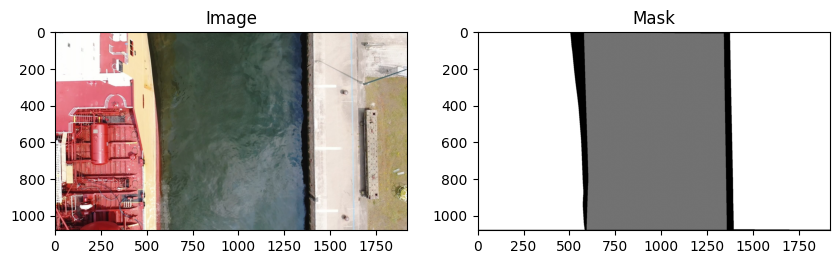

In [6]:
import cv2
import matplotlib.pyplot as plt
import random

img_dir = os.path.join(base_dir, "train/images")
mask_dir = os.path.join(base_dir, "train/masks")

random_img = random.choice(os.listdir(img_dir))

img = cv2.imread(os.path.join(img_dir, random_img))
mask = cv2.imread(os.path.join(mask_dir, random_img.replace(".jpg", ".png")), cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Image")
plt.subplot(1,2,2); plt.imshow(mask, cmap="gray"); plt.title("Mask")
plt.show()


In [7]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = "/content/oil_spill_data"


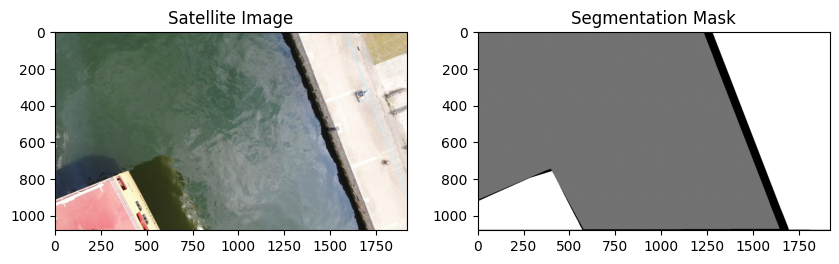

In [8]:
img_dir = os.path.join(base_dir, "train/images")
mask_dir = os.path.join(base_dir, "train/masks")

random_img = random.choice(os.listdir(img_dir))

img = cv2.imread(os.path.join(img_dir, random_img))
mask = cv2.imread(os.path.join(mask_dir, random_img.replace(".jpg", ".png")), cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Satellite Image")
plt.subplot(1,2,2); plt.imshow(mask, cmap="gray"); plt.title("Segmentation Mask")
plt.show()


In [9]:
def preprocess_image(image, size=(256,256)):
    image = cv2.resize(image, size)
    image = image / 255.0
    return image

def preprocess_mask(mask, size=(256,256)):
    mask = cv2.resize(mask, size, interpolation=cv2.INTER_NEAREST)
    mask = mask / 255.0
    return mask

def speckle_reduction(image):
    return cv2.medianBlur(image, 3)


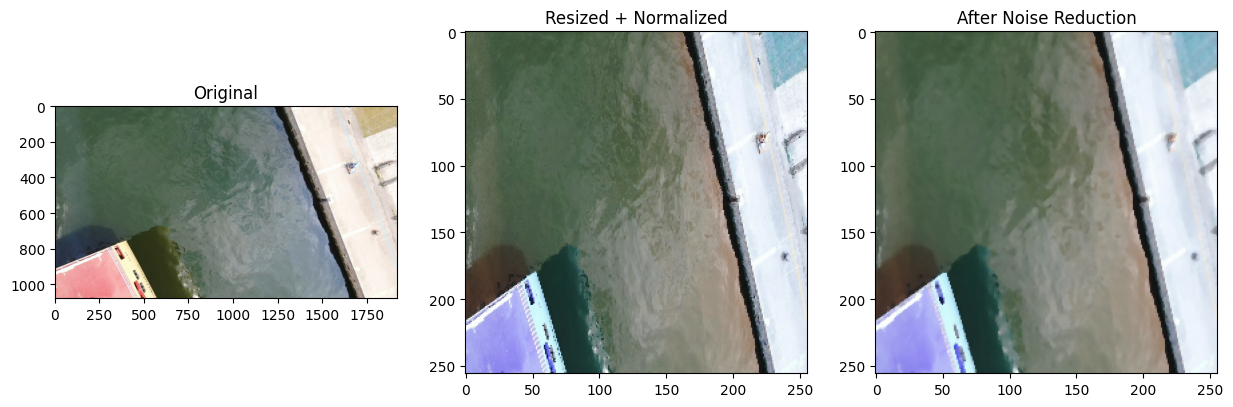

In [10]:
img_pre = preprocess_image(img)
mask_pre = preprocess_mask(mask)


img_denoised = speckle_reduction((img_pre*255).astype(np.uint8))

plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original")
plt.subplot(1,3,2); plt.imshow(img_pre); plt.title("Resized + Normalized")
plt.subplot(1,3,3); plt.imshow(img_denoised, cmap="gray"); plt.title("After Noise Reduction")
plt.show()


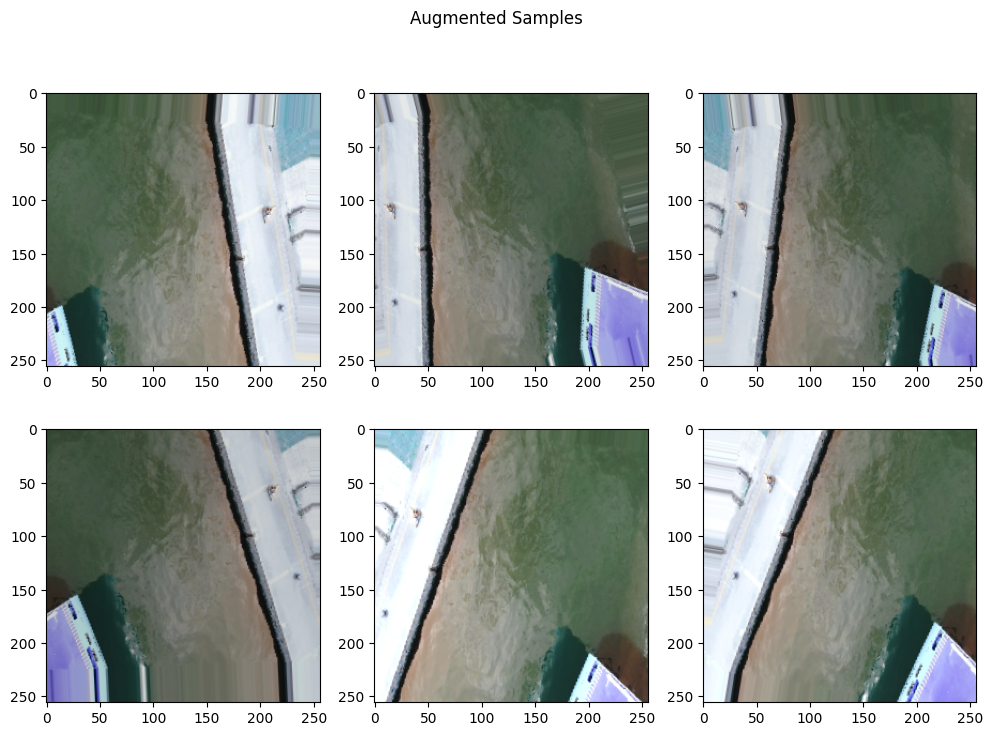

In [11]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8,1.2]
)


img_resized = cv2.resize(img, (256,256))
img_resized = np.expand_dims(img_resized, 0)


plt.figure(figsize=(12,8))
for i, batch in enumerate(datagen.flow(img_resized, batch_size=1)):
    plt.subplot(2,3,i+1)
    plt.imshow(batch[0].astype("uint8"))
    if i == 5: break
plt.suptitle("Augmented Samples")
plt.show()
